# Project: TMDb Movie Dataset (What makes a good movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The selected database includes information about 10,000 movies collected from "The Movie Database" (TMDb). The purpose of this project is to find the most strongly correlated independent variables to movie success (which is represented here as **movie revenue, vote_average and popularity**).

Popularity is a metric referring to how relevant the movie was at the time of extraction of the data. It's built upon number of movie votes, views, times marked as 'favorite' by users, times added to watchlist by users, ...etc per day.

Original data can be found at this kaggle link: "https://www.kaggle.com/tmdb/tmdb-movie-metadata".

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

Taking the first 2 rows of the dataset, it can be seen that there are quite a few columns in this dataset. Due to the difficulty in (or lack of) finding correlation between string-based columns like original_title and homepage, we'll focus on the more numeric columns first for our analysis.

In [6]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [7]:
df.shape

(10866, 21)

We have a total of 10866 entries and it seems like among the numeric columns, data seems to be complete and free of missing values.

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Regarding the string-based columns, it seems we are missing:
1. (10866-10856) = 10 imdb_id entries
2. (10866-10790) = 76 cast entries
3. (10866-2936) = 7930 homepage entries
4. (10866-10822) = 44 director entries
5. (10866-8042) = 2824 tagline entries
6. (10866-9373) = 1493 keywords entries
7. (10866-10862) = 4 overview entries
8. (10866-10843) = 23 genres entries
9. (10866-9836) = 1030 production_companies entries

Given this information, I think it's best to drop a few unneeded columns that aren't suited for data analysis:
- homepage
- tagline
- keywords
- production_companies

They have too many missing records and aren't easily analyzed for correlation due to their values being mostly unique.

In addition, we will also drop the 'overview' column because blobs of text aren't useful in this analysis and also the 'imdb_id' and 'id' because they are irrelevant to the movies themselves and are just pointers to the movies.

I'm leaving the original_title as the identifier of our rows. It won't be used for analysis but it stays.

In [8]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies', 'overview', 'imdb_id', 'id'], axis=1, inplace=True)

In [9]:
df.head(1)

popularity     budget     revenue  original_title  \
0   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   

   vote_count  vote_average  release_year    budget_adj   revenue_adj  
0        5562           6.5          2015  1.379999e+08  1.392446e+09

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


We drop rows with missing values in order to keep our data consistent. After removing the previous columns, our missing data is relatively very little.

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   runtime         10732 non-null  int64  
 7   genres          10732 non-null  object 
 8   release_date    10732 non-null  object 
 9   vote_count      10732 non-null  int64  
 10  vote_average    10732 non-null  float64
 11  release_year    10732 non-null  int64  
 12  budget_adj      10732 non-null  float64
 13  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


We are left with **10732** entries in total.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning

In [13]:
df.head(2)

popularity     budget     revenue      original_title  \
0   32.985763  150000000  1513528810      Jurassic World   
1   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime                                     genres release_date  \
0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   

   vote_count  vote_average  release_year    budget_adj   revenue_adj  
0        5562           6.5          2015  1.379999e+08  1.392446e+09  
1        6185           7.1          2015  1.379999e+08  3.481613e+08

In [14]:
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

Looking at our current dataset, we now look to maintain consistency in the columns themselves and put our data into comparable formats.

Starting off, we convert our 'release_date' column into datetime for more convenient use.

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

Next, I would like to find all the possible genres in the listed movies and put them into a variable to facilitate categorization by genre.

In [18]:
#available genres
av_genres = []

In [19]:
for genres_list in df['genres']:
    genres = genres_list.split('|')
    for genre in genres:
        if genre in av_genres:
            pass
        else:
            av_genres.append(genre)

In [21]:
av_genres, len(av_genres)

(['Action',
  'Adventure',
  'Science Fiction',
  'Thriller',
  'Fantasy',
  'Crime',
  'Western',
  'Drama',
  'Family',
  'Animation',
  'Comedy',
  'Mystery',
  'Romance',
  'War',
  'History',
  'Music',
  'Horror',
  'Documentary',
  'TV Movie',
  'Foreign'],
 20)

Seems like we have 20 different genres.

I noticed in the above describe() that alot of movies have revenues or budgets or both at 0. Since revenue is the main dependant variable in our analysis, this is a big problem.

We can't fill in these zero-value rows with the mean and so we are forced to drop them from our dataset.

In [116]:
df_fail = df.query('revenue == 0')
df_fail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 48 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      5888 non-null   float64       
 1   budget          5888 non-null   int64         
 2   revenue         5888 non-null   int64         
 3   original_title  5888 non-null   object        
 4   cast            5888 non-null   object        
 5   director        5888 non-null   object        
 6   runtime         5888 non-null   int64         
 7   genres          5888 non-null   object        
 8   release_date    5888 non-null   datetime64[ns]
 9   vote_count      5888 non-null   int64         
 10  vote_average    5888 non-null   float64       
 11  release_year    5888 non-null   int64         
 12  budget_adj      5888 non-null   float64       
 13  revenue_adj     5888 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


In [118]:
df.drop(df_fail.index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the most common genres? Are certain genres correlated to more success?

In [119]:
genres_distribution = []
for genre in av_genres:
    genres_distribution.append(len(df[df.genres.str.contains(genre)]))
    print(genre + ' ' + str(len(df[df.genres.str.contains(genre)])))

Action 1261
Adventure 843
Science Fiction 587
Thriller 1423
Fantasy 461
Crime 774
Western 65
Drama 2272
Family 513
Animation 237
Comedy 1770
Mystery 410
Romance 876
War 137
History 153
Music 184
Horror 561
Documentary 97
TV Movie 1
Foreign 30


Text(0.5, 1.0, 'Number of entries per genre')

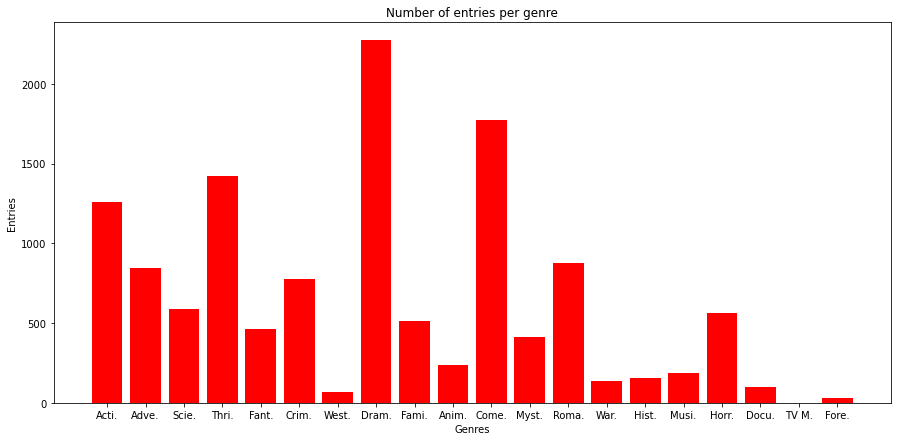

In [135]:
plt.figure(figsize=(15,7))
plt.bar([genre[:4]+'.' for genre in av_genres], genres_distribution, color='red');
plt.xlabel('Genres')
plt.ylabel('Entries')
plt.title('Number of entries per genre')

It appears that in this dataset, drama and comedy are the top 2 most common genres. This must be taken into consideration while observing the genre correlation with our success factors (revenue, vote average, popularity).

In [121]:
genres_rev_distribution = []
for genre in av_genres:
    genres_rev_distribution.append(df[df.genres.str.contains(genre)].revenue.mean())
    print(genre + ' ' + str(df[df.genres.str.contains(genre)].revenue.mean()))

Action 137623797.06106263
Adventure 197420870.26453143
Science Fiction 146854706.68483815
Thriller 85246284.95572734
Fantasy 191373774.15835142
Crime 74119037.29715762
Western 72520569.72307692
Drama 61238953.21434859
Family 173811384.2417154
Animation 221957753.1392405
Comedy 80410189.9322034
Mystery 79454217.06341463
Romance 69741617.15068494
War 93820434.24087591
History 69881953.81699346
Music 63351516.70652174
Horror 49089015.54010695
Documentary 10575912.051546391
TV Movie 42000000.0
Foreign 9161548.3


Text(0.5, 1.0, 'Revenue Average per genre')

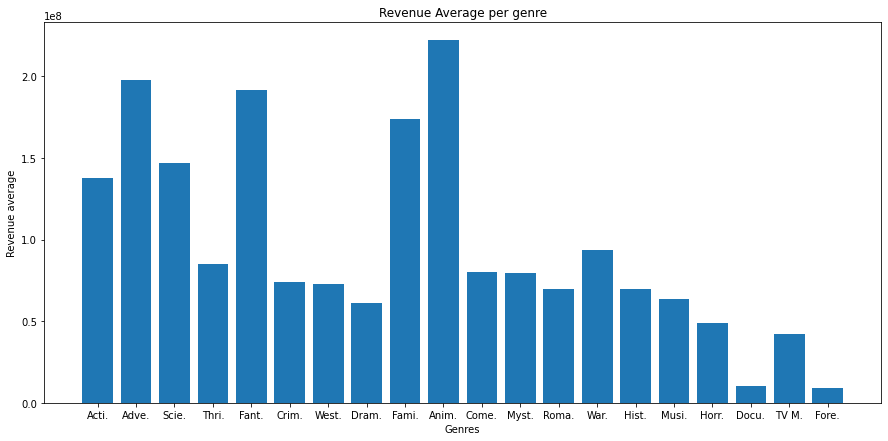

In [136]:
plt.figure(figsize=(15,7))
plt.bar([genre[:4]+'.' for genre in av_genres], genres_rev_distribution);
plt.xlabel('Genres')
plt.ylabel('Revenue average')
plt.title('Revenue Average per genre')

- It seems that although drama and comedy were the 2 most common genres, they actually rank among the least revenue averages. This might be due to over-abundance which leads to people rating them more harshly as they are put up against more competition.
- The top 3 revenue averages are for adventure, fantasy and animation which are actually among the least common genres in our dataset. This further strengthens the correlation that abundance of a certain genre in the movie market might actually reduce its overall revenue. The same can be said about family movies as well.
- This doesn't however seem to be a perfect relation, as for genres like documentaries, tv movies, and foreign movies, they feature low abundance and also low average revenue but this could be due to the fact that these particular genres have a very limited audience to begin with.

In [123]:
genres_vote_distribution = []
for genre in av_genres:
    genres_vote_distribution.append(df[df.genres.str.contains(genre)].vote_average.mean())
    print(genre + ' ' + str(df[df.genres.str.contains(genre)].vote_average.mean()))

Action 6.010785091197466
Adventure 6.114116251482808
Science Fiction 6.001362862010222
Thriller 6.042094167252283
Fantasy 6.019088937093278
Crime 6.2657622739018
Western 6.400000000000004
Drama 6.3547095070422515
Family 6.1042884990253405
Animation 6.3552742616033715
Comedy 6.003107344632771
Mystery 6.16780487804878
Romance 6.155593607305928
War 6.56131386861314
History 6.534640522875818
Music 6.3538043478260855
Horror 5.683957219251337
Documentary 6.885567010309278
TV Movie 5.6
Foreign 6.136666666666667


Text(0.5, 1.0, 'Vote average per genre')

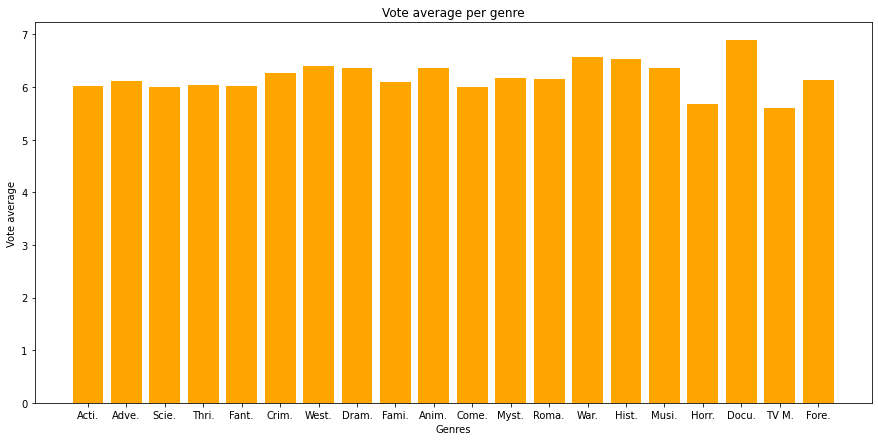

In [138]:
plt.figure(figsize=(15,7))
plt.bar([genre[:4]+'.' for genre in av_genres], genres_vote_distribution, color='orange');
plt.xlabel('Genres')
plt.ylabel('Vote average')
plt.title('Vote average per genre')

Concerning vote comparison, it seems like all the genres are mostly very similar with a notable decrease in the horror genre which might be due to the fact that horror movies are much more subject to criticism due to peoples' different fears and such.

In [125]:
genres_pop_distribution = []
for genre in av_genres:
    genres_pop_distribution.append(df[df.genres.str.contains(genre)].popularity.mean())
    print(genre + ' ' + str(df[df.genres.str.contains(genre)].popularity.mean()))

Action 1.4150150967486128
Adventure 1.7165886761565827
Science Fiction 1.7216117359454848
Thriller 1.1447633162333082
Fantasy 1.5752844837310174
Crime 1.029229082687339
Western 0.9882723538461535
Drama 0.8850365132042245
Family 1.2992576374268994
Animation 1.546209320675105
Comedy 0.8939624836158195
Mystery 1.06375889512195
Romance 0.8368089212328766
War 1.14244299270073
History 0.8914388823529412
Music 0.7521876413043475
Horror 0.7721670392156861
Documentary 0.2575771855670103
TV Movie 0.27362800000000004
Foreign 0.20274413333333333


Text(0.5, 1.0, 'Popularity score average per genre')

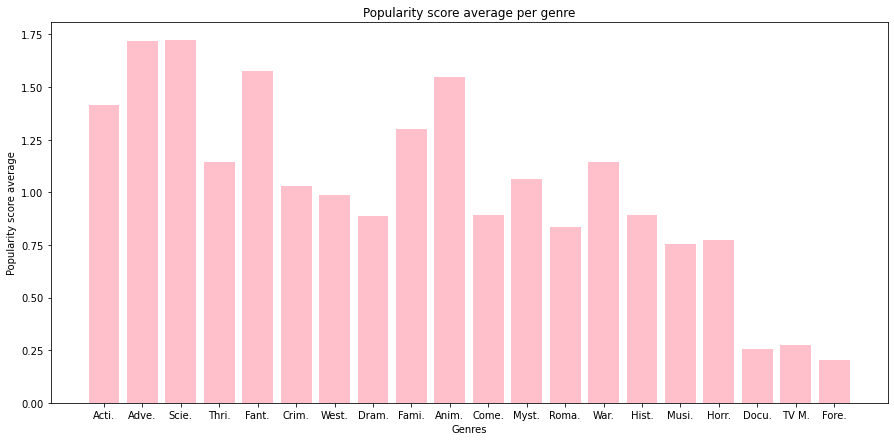

In [139]:
plt.figure(figsize=(15,7))
plt.bar([genre[:4]+'.' for genre in av_genres], genres_pop_distribution, color='pink');
plt.xlabel('Genres')
plt.ylabel('Popularity score average')
plt.title('Popularity score average per genre')

Regarding the popularity distribution, there seems to be a correlation with the our revenue plot. Adventure, Fantasy, Animation are very high on the popularity scale as well as family movies; This syncs with our revenue plot quite well which means that popularity seems strongly correlated with revenue which makes sense.

Another notable comment is that science fiction seems to have a high popularity score while having a below-average revenue average. This might mean that science fiction movies are popular but suffer low revenue due to possibly a higher budget. Let's take a look.

Text(0.5, 1.0, 'Popularity vs Revenue (Outliers removed)')

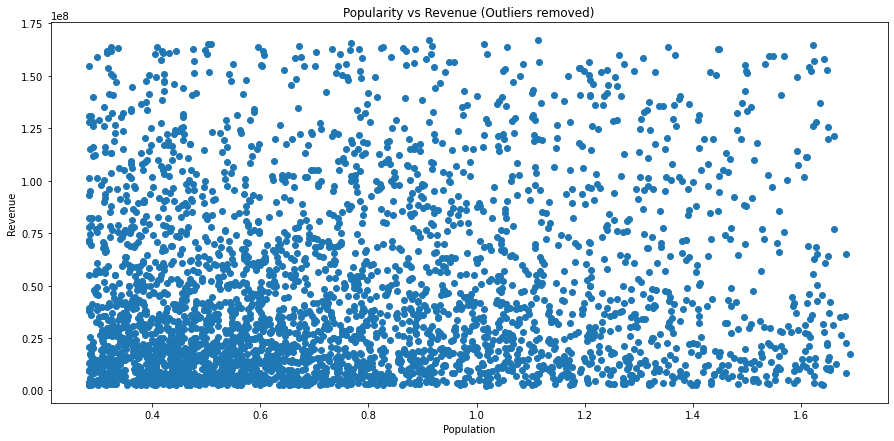

In [208]:
plt.figure(figsize=(15,7))
pop_no_outliers = df.popularity[df.popularity.between(df.popularity.quantile(.15), df.popularity.quantile(.85))]
rev_no_outliers = df.revenue[df.revenue.between(df.revenue.quantile(.15), df.revenue.quantile(.85))]
plt.scatter(pop_no_outliers, rev_no_outliers)
plt.xlabel('Population')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue (Outliers removed)')

There seems to be a slight positive correlation between revenue and popularity however this correlation might seem clearer when grouped by genre.

Text(0.5, 1.0, 'Popularity vs Revenue By Genre (Adventure, Fantasy, Animation)')

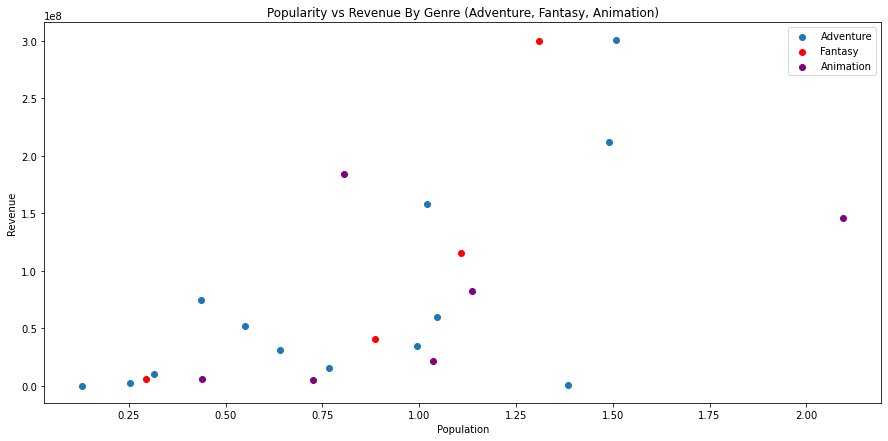

In [212]:
df_adv = df.query('"Adventure" in genres')
df_fant = df.query('"Fantasy" in genres')
df_ani = df.query('"Animation" in genres')
plt.figure(figsize=(15,7))
plt.scatter(df_adv.popularity, df_adv.revenue, label='Adventure')
plt.scatter(df_fant.popularity, df_fant.revenue, color='red', label="Fantasy")
plt.scatter(df_ani.popularity, df_ani.revenue, color='purple', label="Animation")
plt.xlabel('Population')
plt.ylabel('Revenue')
plt.legend()
plt.title('Popularity vs Revenue By Genre (Adventure, Fantasy, Animation)')

There does seem to be a slight positive correlation.

In [106]:
genres_budg_distribution = []
for genre in av_genres:
    genres_budg_distribution.append(df[df.genres.str.contains(genre)].budget.mean())
    print(genre + ' ' + str(df[df.genres.str.contains(genre)].budget.mean()))

Action 27822096.621792175
Adventure 37697457.102389075
Science Fiction 25140281.803600654
Thriller 17240704.714777816
Fantasy 32894414.29405286
Crime 17685957.697932053
Western 19089803.756097563
Drama 11916849.926690541
Family 23677754.831136737
Animation 24376863.167168673
Comedy 13358851.374834437
Mystery 16159169.246287128
Romance 12558171.781615926
War 21047795.701492537
History 18799100.14242424
Music 9631980.050125314
Horror 6230335.157701711
Documentary 595875.4042553192
TV Movie 275925.9259259259
Foreign 1442607.4239130435


Text(0.5, 1.0, 'Budget average per genre')

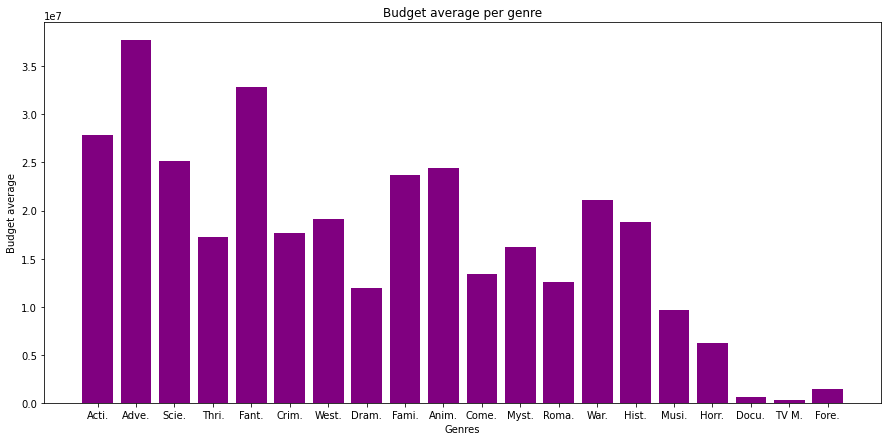

In [140]:
plt.figure(figsize=(15,7))
plt.bar([genre[:4]+'.' for genre in av_genres], genres_budg_distribution, color='purple');
plt.xlabel('Genres')
plt.ylabel('Budget average')
plt.title('Budget average per genre')

And no it seems like science fiction is actually on the lower end of the budget distribution. Another solution to the previous dilemma is that maybe science fiction is able to maintain popularity because it is attractive to watchers and so it's more clickable over time. As in, the amount of people watching science fiction every day is similar and thus it gains a higher popularity rating (according to how popularity is measured which is mentioned near top of report) despite the low amount of watches in general. It makes up for number of watches by consistency of watches.

### Research Question 2: What are the characteristics of good movies in regards to runtime, release date/release year?

Since we will regard revenue as our main success factor. I'll separate our dataset into 2 selections based on revenue median.

In [131]:
revenue_median = df.revenue.median()
print(revenue_median)
df_good = df.query('revenue >= {}'.format(revenue_median))
df_bad = df.query('revenue < {}'.format(revenue_median))
df_good.describe()

31905299.0


popularity        budget       revenue      runtime   vote_count  \
count  2422.000000  2.422000e+03  2.422000e+03  2422.000000  2422.000000   
mean      1.540916  4.874072e+07  1.683704e+08   112.114368   755.953344   
std       1.723572  4.751692e+07  1.999982e+08    23.237805  1025.227287   
min       0.010335  0.000000e+00  3.191160e+07    44.000000    10.000000   
25%       0.679039  1.500000e+07  5.521068e+07    98.000000   171.000000   
50%       1.098407  3.500000e+07  1.000000e+08   109.000000   376.500000   
75%       1.809172  6.800000e+07  1.950922e+08   123.000000   878.250000   
max      32.985763  3.800000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   2422.000000   2422.000000  2.422000e+03  2.422000e+03  
mean       6.270851   2001.563584  5.653799e+07  2.135848e+08  
std        0.748939     10.845803  4.954636e+07  2.435794e+08  
min        3.400000   1960.000000  0.000000e+00  2.939349e+07  
25%        5.800000   1996.000000  2.103337e+07  7.309216e+07  
50%        6.300000   2004.000000  4.292901e+07  1.295371e+08  
75%        6.800000   2010.000000  8.000000e+07  2.535754e+08  
max        8.300000   2015.000000  3.683713e+08  2.827124e+09

In [132]:
df_bad.describe()

popularity        budget       revenue      runtime   vote_count  \
count  2422.000000  2.422000e+03  2.422000e+03  2422.000000  2422.000000   
mean      0.551529  1.046690e+07  1.027270e+07   103.818332   117.500413   
std       0.473114  1.717359e+07  9.463977e+06    17.796918   216.990289   
min       0.001117  0.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.277844  0.000000e+00  1.422789e+06    93.000000    25.000000   
50%       0.446494  4.000000e+06  7.768486e+06   101.000000    53.000000   
75%       0.682876  1.500000e+07  1.738486e+07   112.000000   128.000000   
max       7.192039  4.250000e+08  3.189900e+07   338.000000  5754.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   2422.000000   2422.000000  2.422000e+03  2.422000e+03  
mean       6.026796   2000.269199  1.386501e+07  1.683625e+07  
std        0.827239     12.222238  2.159786e+07  2.162388e+07  
min        2.100000   1960.000000  0.000000e+00  2.370705e+00  
25%        5.500000   1992.000000  0.000000e+00  1.681640e+06  
50%        6.100000   2004.000000  5.698390e+06  1.047514e+07  
75%        6.600000   2010.000000  2.002515e+07  2.440786e+07  
max        8.400000   2015.000000  4.250000e+08  2.108215e+08

Text(0.5, 1.0, 'Good movies by release year')

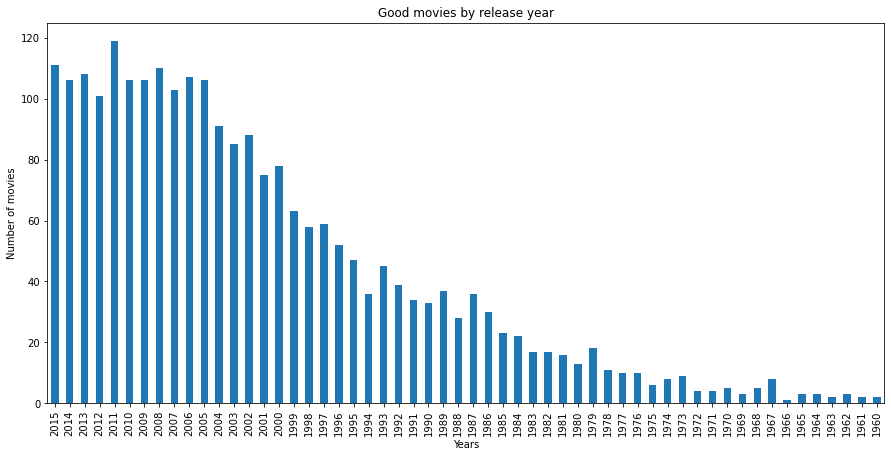

In [206]:
plt.figure(figsize=(15,7))
df_good.release_year.value_counts().sort_index(ascending=False).plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Good movies by release year')

Text(0.5, 1.0, 'Bad movies by release year')

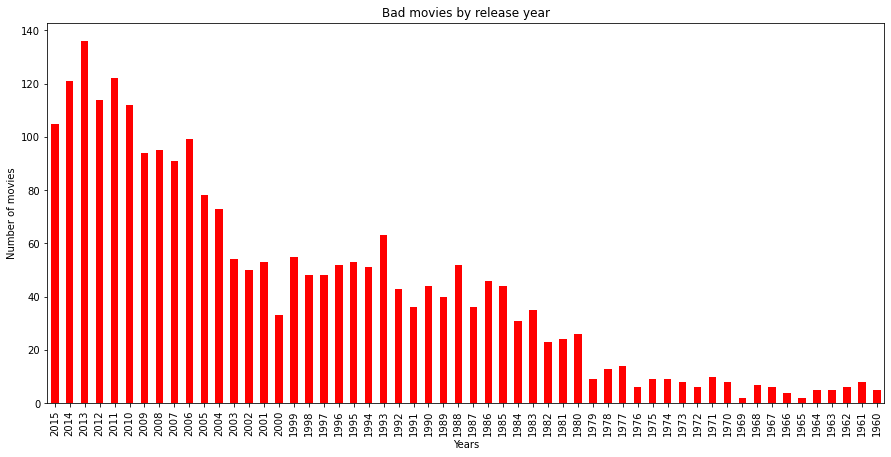

In [207]:
plt.figure(figsize=(15,7))
df_bad.release_year.value_counts().sort_index(ascending=False).plot(kind='bar', color='red')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Bad movies by release year')

Text(0.5, 1.0, 'Bad vs Good movies by release year')

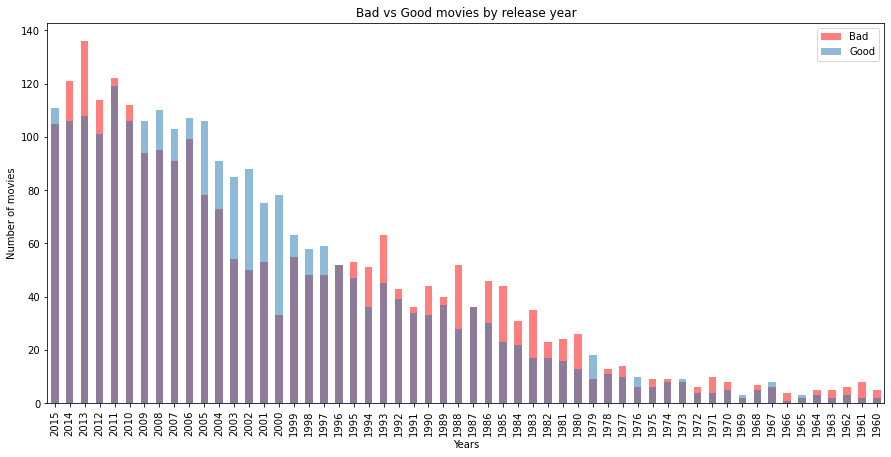

In [168]:
plt.figure(figsize=(15,7))
df_bad.release_year.value_counts().sort_index(ascending=False).plot(kind='bar', color='red', alpha=0.5, label='Bad')
df_good.release_year.value_counts().sort_index(ascending=False).plot(kind='bar',alpha=0.5, label='Good')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Bad vs Good movies by release year')

- It seems from the 3 above distributions that good movies are alot more common in recent years as the distribution is skewed to the right alot more than the bad movies distribution which has a more even distribution across the 1980s. 

Text(0, 0.5, 'Average Runtime')

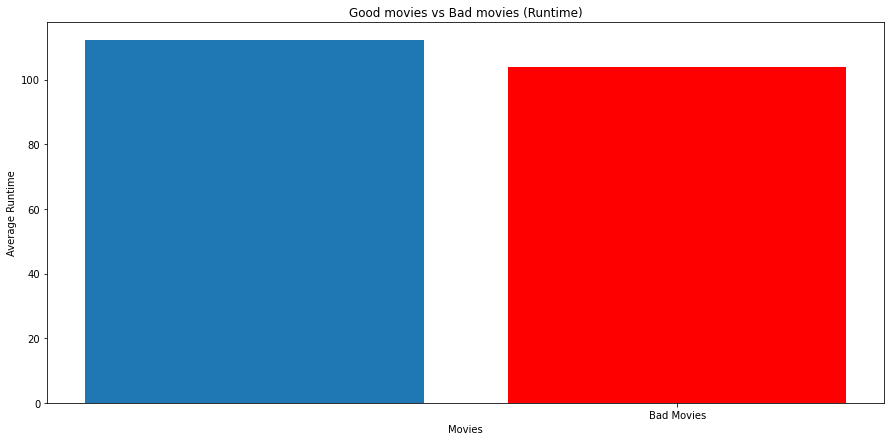

In [183]:
plt.figure(figsize=(15,7))
plt.bar(1,df_good.runtime.mean(), tick_label=['Good Movies']);
plt.bar(2,df_bad.runtime.mean(), tick_label=['Bad Movies'], color='red');
plt.title('Good movies vs Bad movies (Runtime)')
plt.xlabel('Movies')
plt.ylabel('Average Runtime')

- It seems from the above visual that good movies have a higher average runtime than bad movies.

### Research Question 3: Are certain directors producing better movies than others?

Text(0, 0.5, 'Number of good movies')

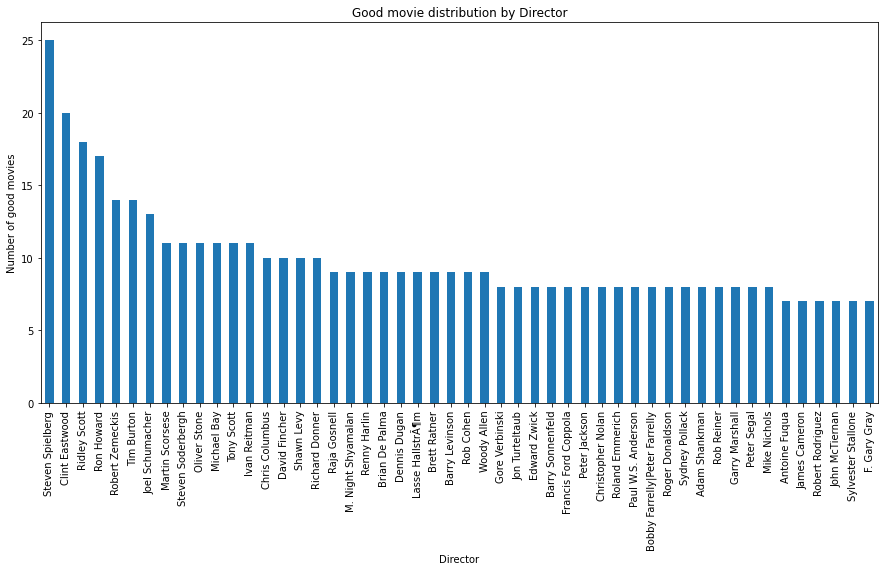

In [194]:
plt.figure(figsize=(15,7))
df_good.director.value_counts()[:50].plot(kind='bar')
plt.title('Good movie distribution by Director')
plt.xlabel('Director')
plt.ylabel('Number of good movies')

- The distribution is mostly skewed to the right and so yes there are directors who are performing alot better than the rest.
- Most notably, Steven Spielberg seems to have quite the sharp increase: directing 25 good movies in comparison to the next entry at 20.
- The distribution seems to be split into groups where a few directors all have the same number of directed movies. I'm not sure what this could mean.

<a id='conclusions'></a>
## Conclusions


>
>* Drama and Comedy are the top 2 most common genres in this dataset.
>* It seems that over-abundance of a genre in the movie pool leads to less average revenue for that genre. Exceptions >to this are genres with limited audiences.
>* Vote averages of genres seem mostly similar except for a notable decrease in horror movies which might be due to the fact that horror movies are much more subject to criticism due to peoples' different fears and such.
>* Popularity seems slightly positively correlated with revenue
>* Good movies are alot more common in recent years.
>* Good movies have a higher average runtime than bad movies.
>* Some directors seem to be directing more good movies than others in the same time period. Notably, Steven Spielberg.

### Limitations

* Had to remove a large number of records in order to maintain consistency due to lack of revenue values